170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 87ms/step - accuracy: 0.3420 - loss: 1.8414 - val_accuracy: 0.5231 - val_loss: 1.3551
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.5508 - loss: 1.2844 - val_accuracy: 0.5706 - val_loss: 1.2267
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.5981 - loss: 1.1506 - val_accuracy: 0.6003 - val_loss: 1.1400


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 32, 32, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(200, 32, 32, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/mod

<Figure size 800x400 with 0 Axes>

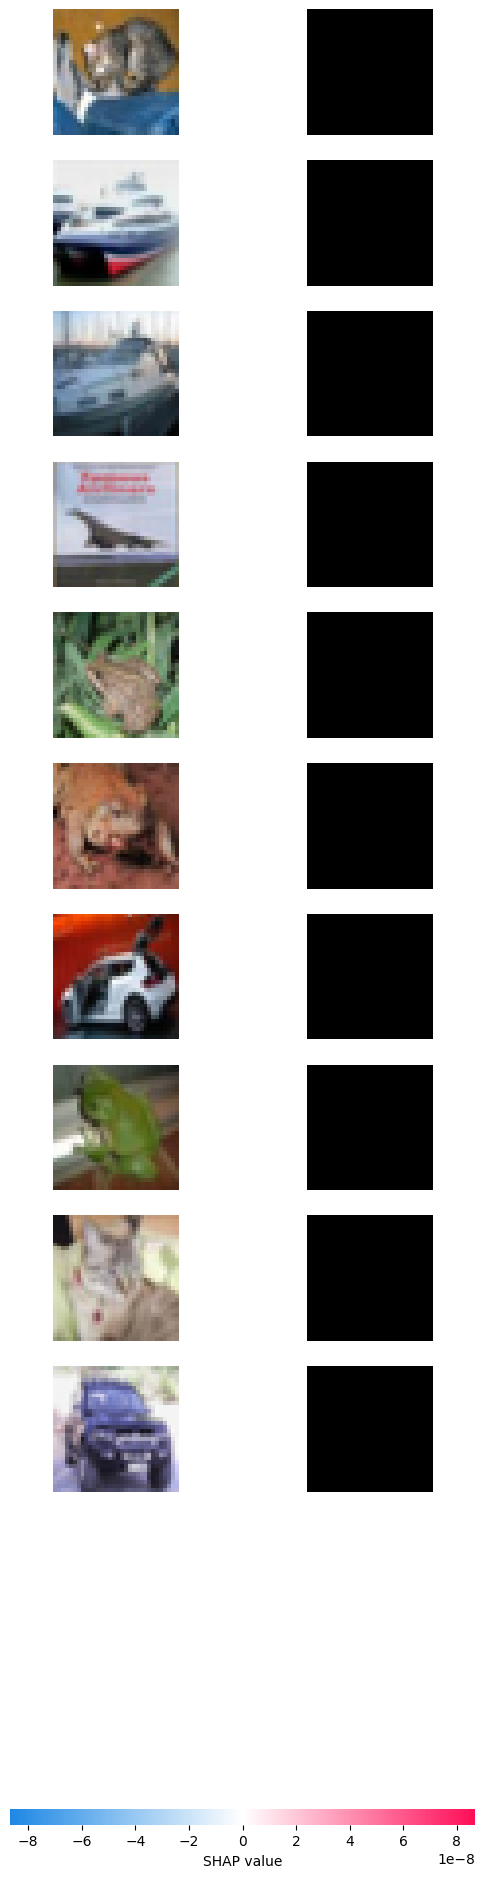

In [1]:
import shap
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model (using fewer epochs for quick execution)
model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test, y_test))

# Select background data for SHAP
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# ✅ Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(model, background)

# Select a few test samples
X_test_sample = x_test[:10]

# ✅ Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# ✅ Visualize SHAP values
plt.figure(figsize=(8, 4))
shap.image_plot(shap_values, X_test_sample)
